<a href="https://colab.research.google.com/github/Susheel06/mnsit_handwritten_digits/blob/master/MNSIT_Handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

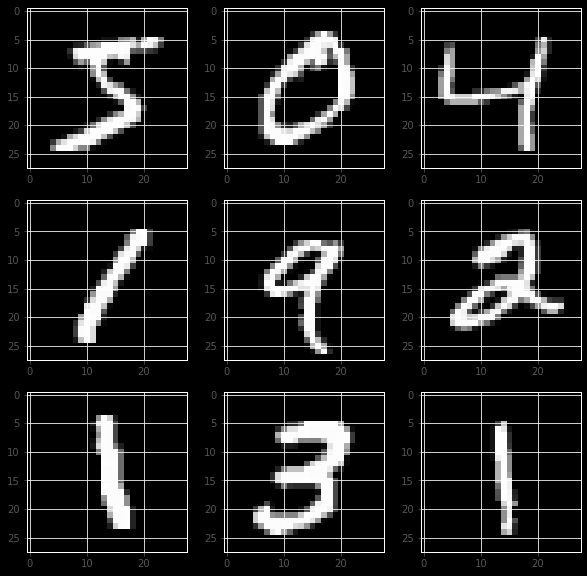

In [ ]:
plt.figure(facecolor='k', figsize=(10, 10))
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

x_train = x_train.reshape((x_train.shape[0], 784))
x_test = x_test.reshape((x_test.shape[0], 784))

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(169, activation='sigmoid', input_dim = x_train.shape[1], kernel_constraint=tf.keras.constraints.NonNeg()),
        tf.keras.layers.Dense(10, activation='softmax', kernel_constraint=tf.keras.constraints.NonNeg())
])

In [ ]:
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 169)               132665    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1700      
Total params: 134,365
Trainable params: 134,365
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(
  x = x_train,
  y = y_train,
  epochs=30,
  validation_data=(x_test, y_test),
  verbose=1,
  batch_size=10
  )

Epoch 1/30
6000/6000 [==============================] - 15s 2ms/step - loss: 0.7701 - acc: 0.7595 - val_loss: 0.3621 - val_acc: 0.8880
Epoch 2/30
6000/6000 [==============================] - 15s 2ms/step - loss: 0.3219 - acc: 0.9046 - val_loss: 0.2671 - val_acc: 0.9220
Epoch 3/30
6000/6000 [==============================] - 15s 2ms/step - loss: 0.2621 - acc: 0.9224 - val_loss: 0.2347 - val_acc: 0.9304
Epoch 4/30
6000/6000 [==============================] - 15s 2ms/step - loss: 0.2267 - acc: 0.9340 - val_loss: 0.2302 - val_acc: 0.9258
Epoch 5/30
6000/6000 [==============================] - 15s 2ms/step - loss: 0.2015 - acc: 0.9414 - val_loss: 0.2077 - val_acc: 0.9386
Epoch 6/30
6000/6000 [==============================] - 15s 2ms/step - loss: 0.1844 - acc: 0.9466 - val_loss: 0.1717 - val_acc: 0.9492
Epoch 7/30
6000/6000 [==============================] - 14s 2ms/step - loss: 0.1688 - acc: 0.9504 - val_loss: 0.1682 - val_acc: 0.9481
Epoch 8/30
6000/6000 [==============================] -

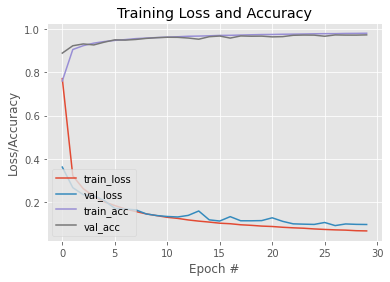

In [ ]:
N = 30 
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [ ]:
from keras import backend as K

get_layer_output = K.function([model.layers[0].input],
                              [model.layers[0].output, model.layers[1].output])

layer1_output, layer2_output = get_layer_output([x_train])

Using TensorFlow backend.


In [ ]:
train_ids = [np.arange(len(y_train))[y_train[:,i] == 1] for i in range(10)]

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation

plt.rcParams["animation.html"] = "jshtml"

In [ ]:
%%capture
%matplotlib inline

# digit to be plotted
digit = 3

# indices of frames to be plotted for this digit
n = range(50)

# initialize plots
f, (ax1, ax2, ax4) = plt.subplots(1, 3, figsize=(15,4))

# prepare plots
ax1.set_title('Input Layer', fontsize=16)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.set_title('Hidden Layer 1', fontsize=16)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
    
ax4.set_title('Output Layer', fontsize=16)
ax4.axes.get_xaxis().set_visible(False)
ax4.axes.get_yaxis().set_visible(False)   

# add numbers to the output layer plot to indicate label
for i in range(3):
    for j in range(4):
        text = ax4.text(j, i, [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, '', '']][i][j],
                        ha="center", va="center", color="w", fontsize=16)    
        
def animate(id):
    # plot elements that are changed in the animation
    digit_plot = ax1.imshow(x_train[train_ids[digit][id]].reshape((28,28)), animated=True)
    layer1_plot = ax2.imshow(layer1_output[train_ids[digit][id]].reshape((13,13)), animated=True)
    output_plot = ax4.imshow(np.append(layer2_output[train_ids[digit][id]], 
                                       [np.nan, np.nan]).reshape((3,4)), animated=True)
    return digit_plot, layer1_plot, output_plot,

# define animation
ani = matplotlib.animation.FuncAnimation(f, animate, frames=n, interval=100)

In [ ]:
ani

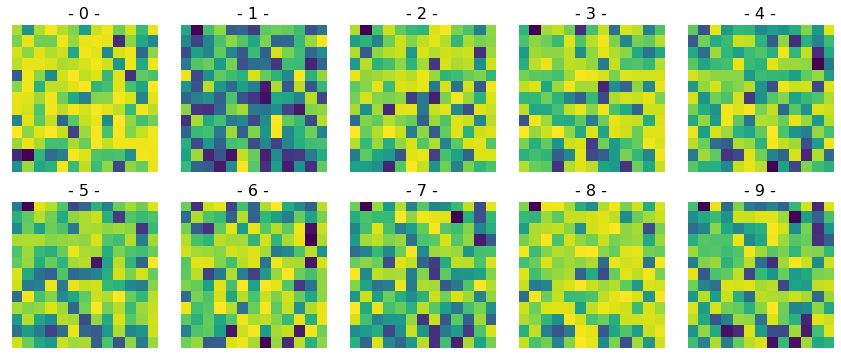

In [ ]:
f, ax_arr = plt.subplots(2, 5, figsize=(15,10))

f.subplots_adjust(wspace=0.05, bottom=0.5, top=0.95)

for i, ax in enumerate(np.ravel(ax_arr)):
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if i <= 10:
        ax.set_title('- {} -'.format(i), fontsize=16)
        layer1_plot = ax.imshow(np.sum(layer1_output[train_ids[i]], axis=0).reshape((13,13)))